In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import datetime

from sklearn import preprocessing

In [113]:
df_bike = pd.read_csv("Datas/train.csv")

- Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather:
-           1: Clear, Few clouds, Partly cloudy, Partly cloudy
-           2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
-           3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
-           4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [114]:
df_bike.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [115]:
df_bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [116]:
df_bike.loc[df_bike['workingday'] == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [117]:
df_bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

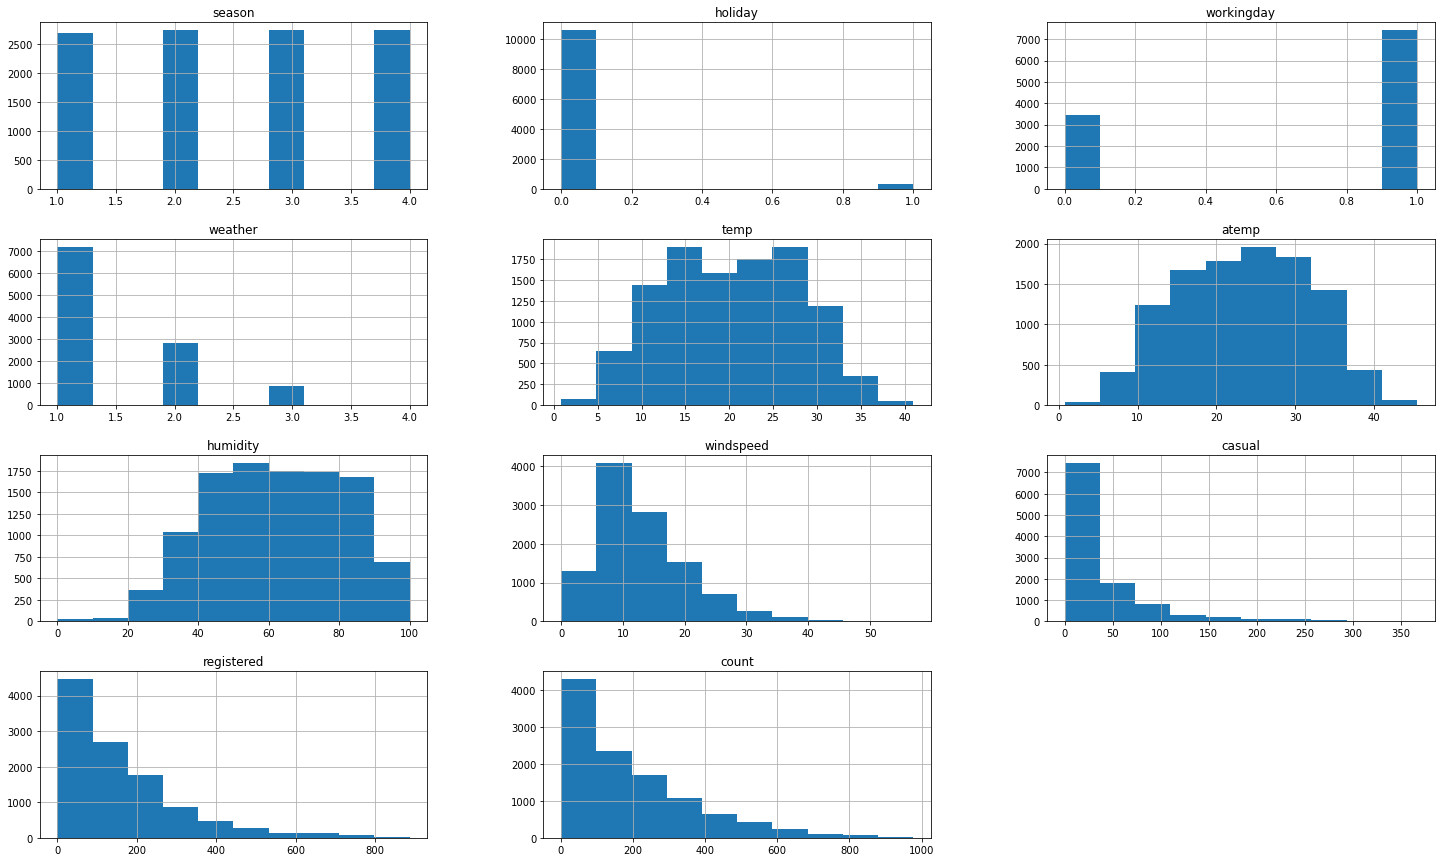

In [118]:
df_bike.hist(figsize=(25,15))

In [119]:
print(df_bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [120]:
# add year colume
df_bike['year'] = pd.to_datetime(df_bike['datetime']).dt.year
df_bike['month'] = pd.to_datetime(df_bike['datetime']).dt.month
df_bike['day'] = pd.to_datetime(df_bike['datetime']).dt.day
df_bike['hour'] = pd.to_datetime(df_bike['datetime']).dt.hour
df_bike['dayofweek'] = pd.to_datetime(df_bike['datetime']).dt.weekday
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [121]:
df_bike['date_data'] = df_bike['year'].map(str)+ '-' +df_bike['month'].map(str)
df_bike['date_data'] = pd.to_datetime(df_bike['date_data'], format='%Y-%m').dt.strftime('%Y-%m')

df_group_month_mean = df_bike.groupby('date_data',as_index=False).mean()
df_group_month_count = df_bike.groupby('date_data',as_index=False).count()
df_group_month_sum = df_bike.groupby('date_data',as_index=False).sum()


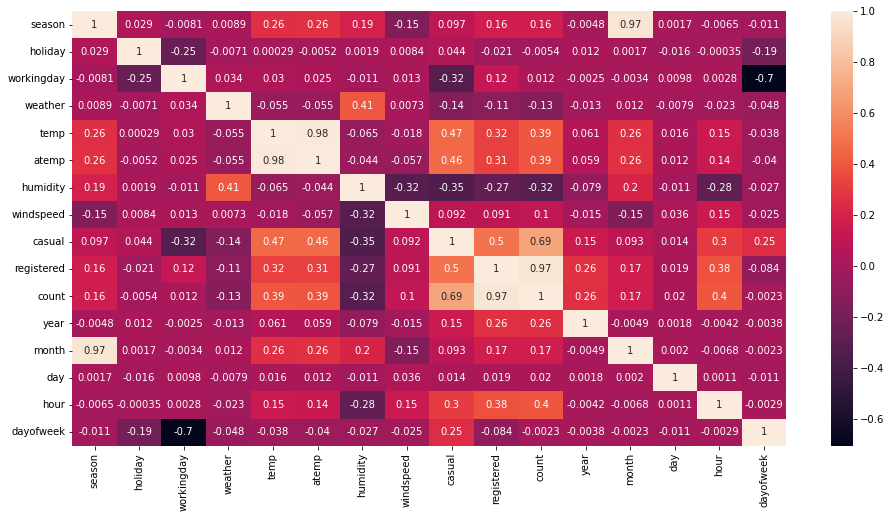

In [122]:
plt.figure(figsize=(16,8))
sns.heatmap(df_bike.corr(), annot=True)
plt.show()

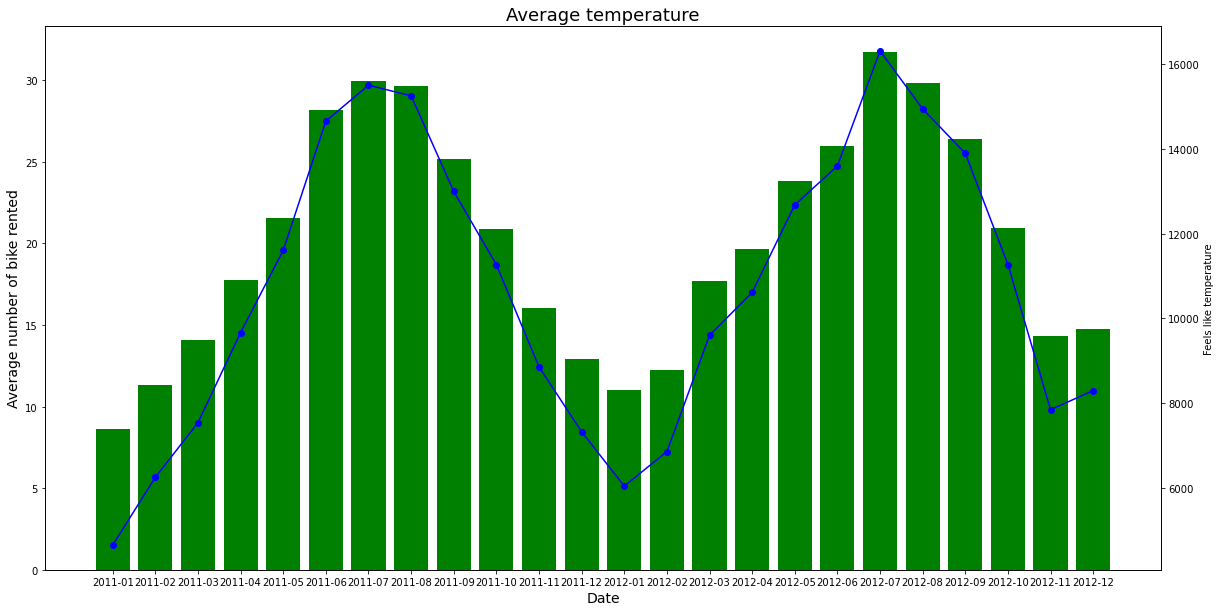

In [139]:

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
plt.title('Average temperature',fontsize=18)
ax.bar(df_group_month_mean['date_data'], df_group_month_mean['temp'],color='green')
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Average number of bike rented',fontsize=14)

ax2=ax.twinx()
ax2.plot(df_group_month_sum['date_data'], df_group_month_sum['atemp'],color='blue',marker="o")
ax2.set_ylabel('Feels like temperature')
plt.show()

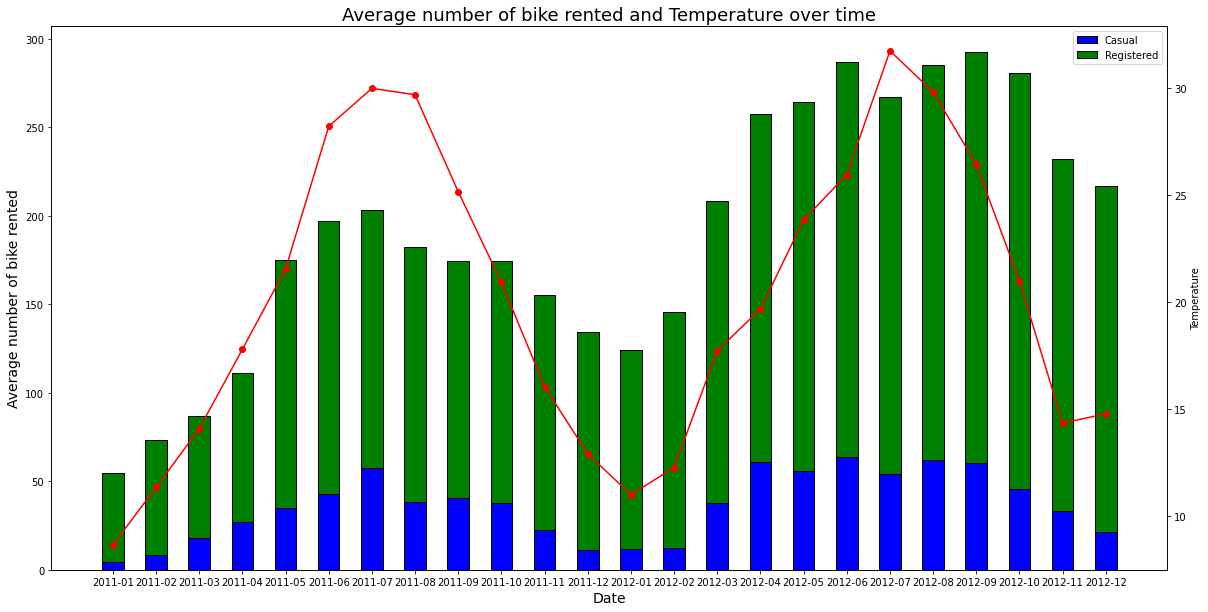

In [124]:
width = 0.5

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
plt.title('Average number of bike rented and Temperature over time',fontsize=18)


ax.bar(df_group_month_mean['date_data'], df_group_month_mean['casual'], color = 'b',
        width = width, edgecolor = 'black',
        label='Casual')
ax.bar(df_group_month_mean['date_data'], df_group_month_mean['registered'], color = 'g',
        width = width, edgecolor = 'black',
        label='Registered', bottom=df_group_month_mean['casual'])
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Average number of bike rented',fontsize=14)

ax.legend()

ax2=ax.twinx()
ax2.plot(df_group_month_sum['date_data'], df_group_month_mean['temp'],color='red',marker="o")
ax2.set_ylabel('Temperature')
  
plt.show()

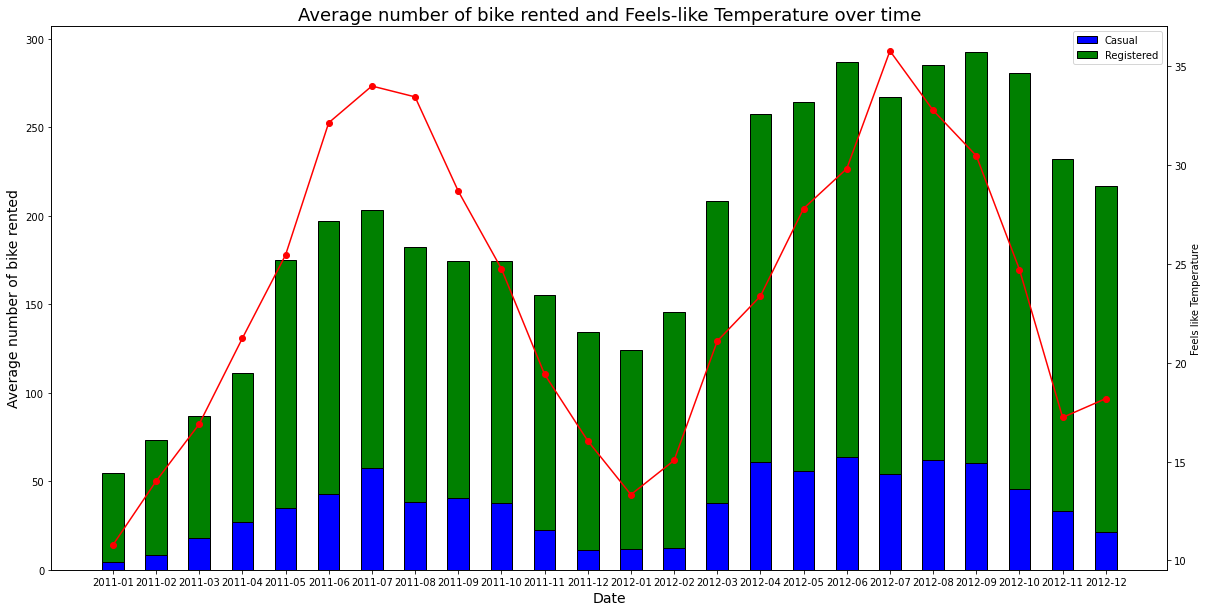

In [125]:
width = 0.5

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
plt.title('Average number of bike rented and Feels-like Temperature over time',fontsize=18)


ax.bar(df_group_month_mean['date_data'], df_group_month_mean['casual'], color = 'b',
        width = width, edgecolor = 'black',
        label='Casual')
ax.bar(df_group_month_mean['date_data'], df_group_month_mean['registered'], color = 'g',
        width = width, edgecolor = 'black',
        label='Registered', bottom=df_group_month_mean['casual'])
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Average number of bike rented',fontsize=14)

ax.legend()

ax2=ax.twinx()
ax2.plot(df_group_month_sum['date_data'], df_group_month_mean['atemp'],color='red',marker="o")
ax2.set_ylabel('Feels like Temperature')
  
plt.show()

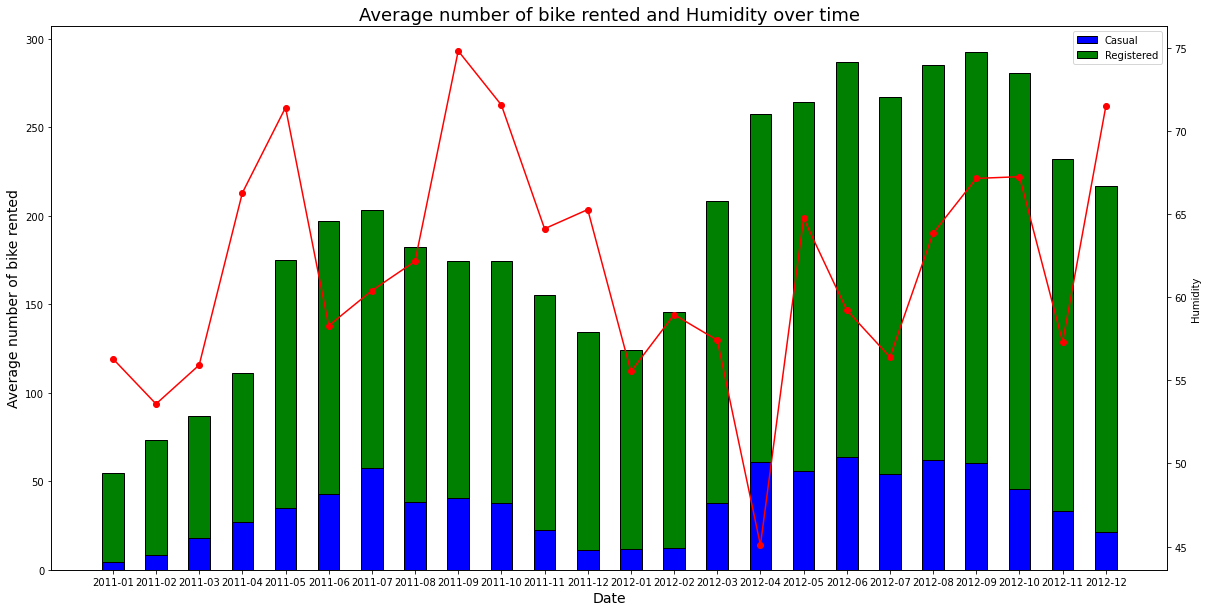

In [126]:
width = 0.5

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
plt.title('Average number of bike rented and Humidity over time',fontsize=18)


ax.bar(df_group_month_mean['date_data'], df_group_month_mean['casual'], color = 'b',
        width = width, edgecolor = 'black',
        label='Casual')
ax.bar(df_group_month_mean['date_data'], df_group_month_mean['registered'], color = 'g',
        width = width, edgecolor = 'black',
        label='Registered', bottom=df_group_month_mean['casual'])
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Average number of bike rented',fontsize=14)

ax.legend()

ax2=ax.twinx()
ax2.plot(df_group_month_sum['date_data'], df_group_month_mean['humidity'],color='red',marker="o")
ax2.set_ylabel('Humidity')
  
plt.show()

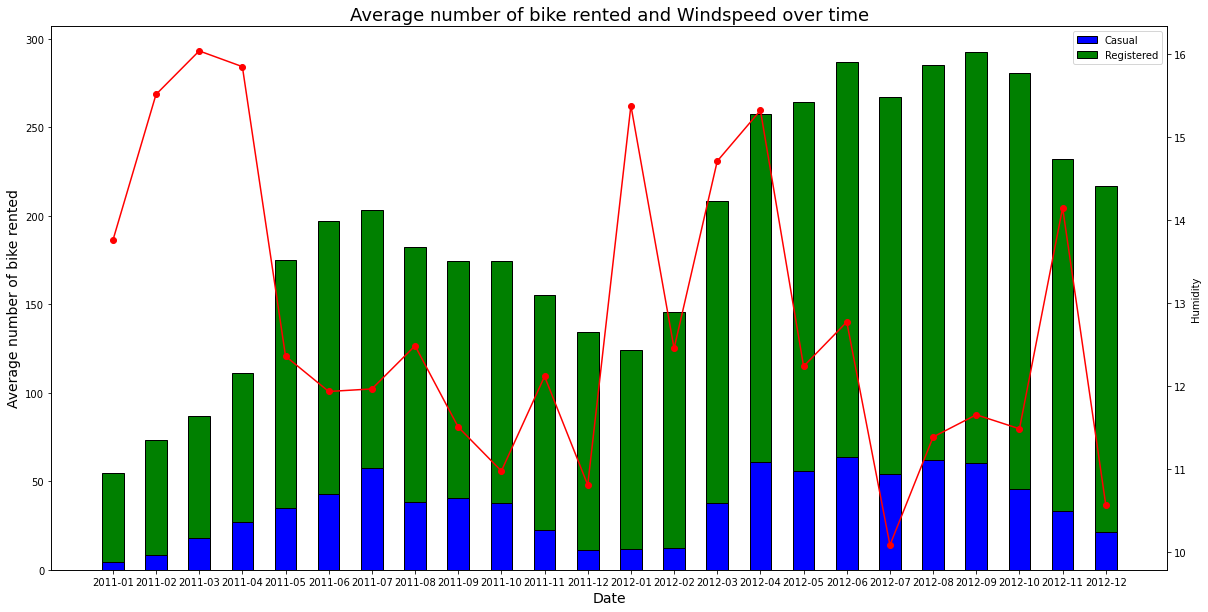

In [127]:
width = 0.5

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
plt.title('Average number of bike rented and Windspeed over time',fontsize=18)


ax.bar(df_group_month_mean['date_data'], df_group_month_mean['casual'], color = 'b',
        width = width, edgecolor = 'black',
        label='Casual')
ax.bar(df_group_month_mean['date_data'], df_group_month_mean['registered'], color = 'g',
        width = width, edgecolor = 'black',
        label='Registered', bottom=df_group_month_mean['casual'])
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Average number of bike rented',fontsize=14)

ax.legend()

ax2=ax.twinx()
ax2.plot(df_group_month_sum['date_data'], df_group_month_mean['windspeed'],color='red',marker="o")
ax2.set_ylabel('Humidity')
  
plt.show()

## Average hourly rental during working day over time

In [128]:
df_group_hour_workday_mean = df_bike.loc[df_bike['workingday'] ==1].groupby('hour',as_index=False).mean()
# df_group_month_count = df_bike.groupby('date_data',as_index=False).count()
# df_group_month_sum = df_bike.groupby('date_data',as_index=False).sum()

In [129]:
df_plot_group_hour_workday_mean = df_group_hour_workday_mean[['hour', 'casual', 'registered']]
df_index_hour_workday = df_group_hour_workday_mean[['hour']]

index=df_index_hour_workday.values.tolist()

# df = pd.DataFrame(df_group_hour_workday_mean, columns=['casual', 'registered'], index=[i[0] for i in df_group_hour_workday_mean])

# df = pd.DataFrame({'casual': df_group_hour_workday_mean['casual'],
#                    'registered': df_group_hour_workday_mean['registered']}, index=index)

In [130]:
df_plot_group_hour_workday_mean.set_index('hour',inplace=True)


Text(0, 0.5, 'Temperature')

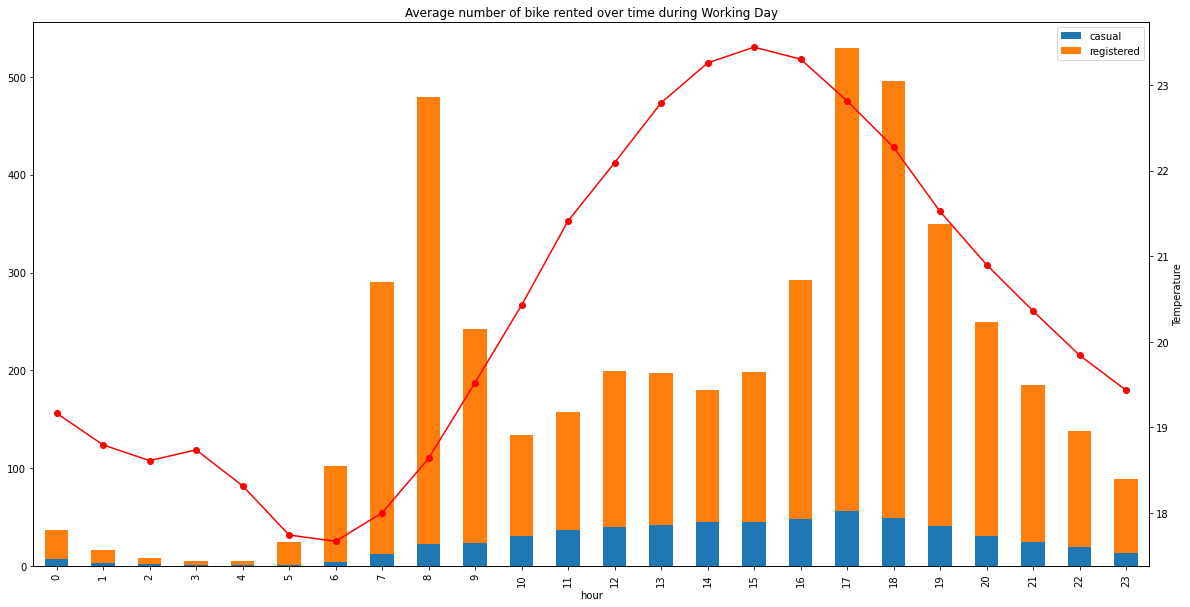

In [131]:
# plt.rcParams["figure.figsize"] = (20,10)

# fig, ax = plt.subplots()
# plt.title('Average number of bike rented over time during Working Day',fontsize=18)


ax = df_plot_group_hour_workday_mean.plot.bar(stacked=True, title="Average number of bike rented and temperature over time during Working Day")

ax2=ax.twinx()
ax2.plot(df_group_hour_workday_mean['hour'], df_group_hour_workday_mean['temp'],color='red',marker="o")
ax2.set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

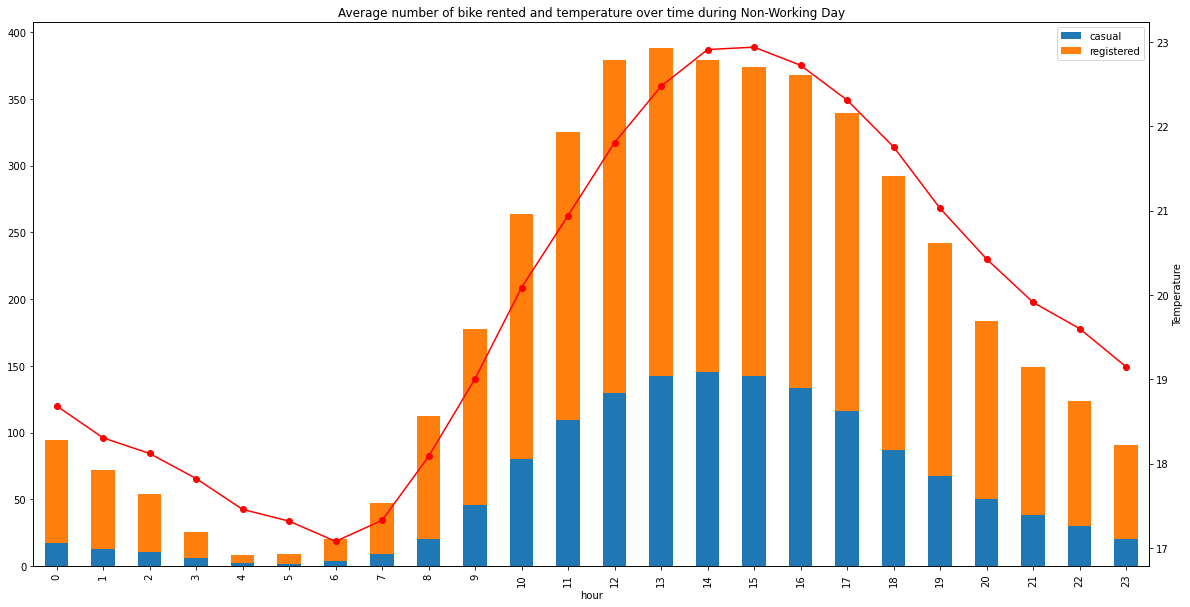

In [132]:
df_group_hour_nowork_mean = df_bike.loc[df_bike['workingday'] ==0].groupby('hour',as_index=False).mean()
df_plot_group_hour_nowork_mean = df_group_hour_nowork_mean[['hour', 'casual', 'registered']]
df_plot_group_hour_nowork_mean.set_index('hour',inplace=True)
ax = df_plot_group_hour_nowork_mean.plot.bar(stacked=True, title="Average number of bike rented and temperature over time during Non-Working Day")

ax2=ax.twinx()
ax2.plot(df_group_hour_nowork_mean['hour'], df_group_hour_nowork_mean['temp'],color='red',marker="o")
ax2.set_ylabel('Temperature')
  


## Plot over weekday 

In [136]:
df_group_dayofweek = df_bike.groupby('dayofweek',as_index=False).mean()


In [137]:
df_group_dayofweek

,dayofweek,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,0,2.560284,0.154094,0.845906,1.398453,20.620542,24.178507,62.508059,12.921691,29.843972,160.546744,190.390716,2011.508704,6.651193,10.174081,11.549968
1,1,2.511371,0.000000,1.000000,1.510721,20.732307,24.252898,63.662768,13.338829,22.979207,166.744639,189.723847,2011.497726,6.481481,9.922027,11.596491
2,2,2.482914,0.015474,0.984526,1.501612,20.323417,23.764271,64.299162,12.635379,22.521599,165.889749,188.411348,2011.509994,6.421019,10.089620,11.548678
3,3,2.480361,0.000000,1.000000,1.377978,20.251835,23.641465,58.397939,13.138079,24.007083,173.289118,197.296201,2011.509337,6.455248,9.947843,11.537669
4,4,2.506867,0.031393,0.968607,1.368215,19.993198,23.066609,59.913015,12.398527,31.001962,166.842381,197.844343,2011.486593,6.567691,9.901897,11.535644
5,5,2.500000,0.000000,0.000000,1.393939,19.668611,23.121266,61.253157,12.670136,63.625000,133.040404,196.665404,2011.484848,6.560606,10.030303,11.500000
6,6,2.504750,0.000000,0.000000,1.379354,20.041963,23.569766,63.151995,12.499344,57.051298,123.788474,180.839772,2011.516149,6.512983,9.881571,11.524383


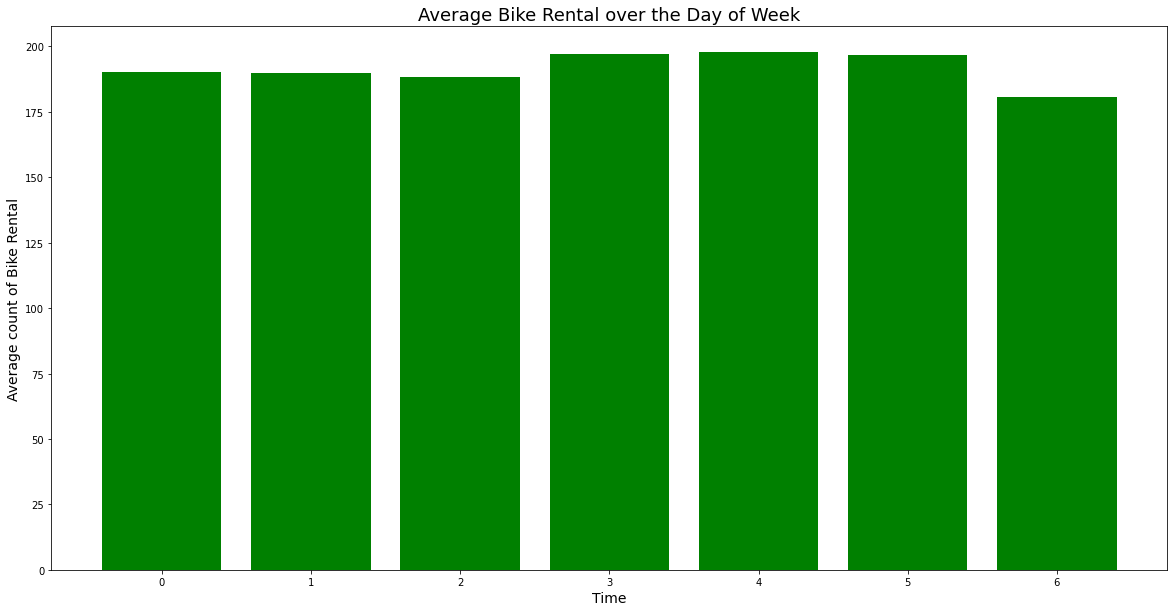

In [138]:

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
plt.title('Average Bike Rental over the Day of Week',fontsize=18)
ax.bar(df_group_dayofweek['dayofweek'], df_group_dayofweek['count'],color='green')
ax.set_xlabel('Time',fontsize=14)
ax.set_ylabel('Average count of Bike Rental',fontsize=14)

plt.show()

In [140]:
df_bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,6.000000


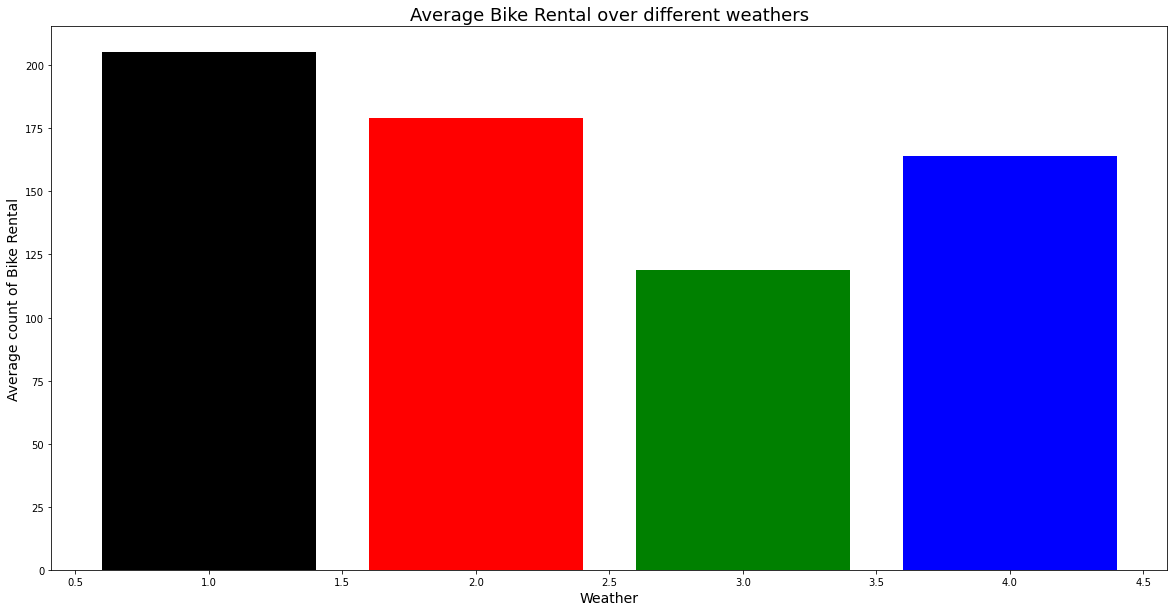

In [156]:
df_group_weather = df_bike.groupby('weather',as_index=False).mean()

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()

plt.title('Average Bike Rental over different weathers',fontsize=18)
ax.bar(df_group_weather['weather'], df_group_weather['count'],color=['black', 'red', 'green', 'blue'])


ax.set_xlabel('Weather',fontsize=14)
ax.set_ylabel('Average count of Bike Rental',fontsize=14)

plt.show()

In [157]:
df_bike.loc[df_bike['humidity']==0] # error?

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,date_data
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3,2011,3,10,0,3,2011-03
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2,2011,3,10,1,3,2011-03
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1,2011,3,10,2,3,2011-03
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3,2011,3,10,5,3,2011-03
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12,2011,3,10,6,3,2011-03
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37,2011,3,10,7,3,2011-03
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44,2011,3,10,8,3,2011-03
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24,2011,3,10,9,3,2011-03
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17,2011,3,10,10,3,2011-03
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11,2011,3,10,11,3,2011-03


In [165]:
df_bike.loc[(df_bike['year']==2012) & (df_bike['month']==1) & (df_bike['day']==1)] # error?

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,date_data
5422,2012-01-01 00:00:00,1,0,0,1,14.76,18.940,66,0.0000,5,43,48,2012,1,1,0,6,2012-01
5423,2012-01-01 01:00:00,1,0,0,1,14.76,17.425,66,8.9981,15,78,93,2012,1,1,1,6,2012-01
5424,2012-01-01 02:00:00,1,0,0,1,13.12,17.425,76,0.0000,16,59,75,2012,1,1,2,6,2012-01
5425,2012-01-01 03:00:00,1,0,0,1,12.30,16.665,81,0.0000,11,41,52,2012,1,1,3,6,2012-01
5426,2012-01-01 04:00:00,1,0,0,1,11.48,15.150,81,6.0032,0,8,8,2012,1,1,4,6,2012-01
5427,2012-01-01 05:00:00,1,0,0,1,11.48,14.395,81,7.0015,0,5,5,2012,1,1,5,6,2012-01
5428,2012-01-01 06:00:00,1,0,0,1,10.66,13.635,93,8.9981,1,1,2,2012,1,1,6,6,2012-01
5429,2012-01-01 07:00:00,1,0,0,1,10.66,12.880,93,11.0014,1,6,7,2012,1,1,7,6,2012-01
5430,2012-01-01 08:00:00,1,0,0,1,10.66,13.635,87,7.0015,4,10,14,2012,1,1,8,6,2012-01
5431,2012-01-01 09:00:00,1,0,0,1,10.66,13.635,93,7.0015,13,27,40,2012,1,1,9,6,2012-01


## Prepare dataset for both training and testing dataset
## save the dataset to csv file??

In [166]:
df_bike.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,date_data
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2,2012-12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2,2012-12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2,2012-12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2,2012-12
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,2,2012-12


In [174]:
le = preprocessing.LabelEncoder()

df_bike_for_encode = df_bike.copy()
df_bike_for_encode.drop(columns=['datetime', 'casual', 'registered', 'date_data'],inplace=True)

categorial =  ['season','holiday','workingday', 'weather','year', 'month',
            'day','hour', 'dayofweek']

# df_encode = pd.get_dummies(df_bike_for_encode[categorial], drop_first=True) #drop first permet de oneHotencoder plutot que de get_dummies
# df_encode= le.fit_transform(df_bike_for_encode[categorial])

# df_new = df_bike_for_encode.drop(categorial, axis=1).join(df_encode)


quantitative=['temp','atemp', 'humidity','windspeed',]
scaler = preprocessing.MinMaxScaler()
df_bike_for_encode[quantitative] = scaler.fit_transform(df_bike_for_encode[quantitative])

In [176]:
df_bike_for_encode.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,1,0,0,1,0.224490,0.305068,0.81,0.0,16,2011,1,1,0,5
1,1,0,0,1,0.204082,0.288064,0.80,0.0,40,2011,1,1,1,5
2,1,0,0,1,0.204082,0.288064,0.80,0.0,32,2011,1,1,2,5
3,1,0,0,1,0.224490,0.305068,0.75,0.0,13,2011,1,1,3,5
4,1,0,0,1,0.224490,0.305068,0.75,0.0,1,2011,1,1,4,5


In [179]:
df_bike_for_encode.to_csv('Datas/data_minzhi.csv', index=False)

# Data analyse for Test Data

In [177]:
# for test data
df_bike_test = pd.read_csv("Datas/test.csv")


In [178]:
# add year colume
df_bike_test['year'] = pd.to_datetime(df_bike_test['datetime']).dt.year
df_bike_test['month'] = pd.to_datetime(df_bike_test['datetime']).dt.month
df_bike_test['day'] = pd.to_datetime(df_bike_test['datetime']).dt.day
df_bike_test['hour'] = pd.to_datetime(df_bike_test['datetime']).dt.hour
df_bike_test['dayofweek'] = pd.to_datetime(df_bike_test['datetime']).dt.weekday
df_bike_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


In [ ]:
df_bike_for_encode = df_bike.copy()
df_bike_for_encode.drop(columns=['datetime', 'casual', 'registered', 'date_data'],inplace=True)
scaler = preprocessing.MinMaxScaler()
df_bike_for_encode[quantitative] = scaler.fit_transform(df_bike_for_encode[quantitative])